TP4 : interpolation d'images, morphomaths, segmentation, Transformée de Hough

## Redimensionnement, rotation, interpolation

In [1]:
from skimage.transform import rotate
import skimage.morphology as mp
import matplotlib.pyplot as plt
import numpy as np
from image_loader import images
import cv2

In [2]:
img = images["ancien"]

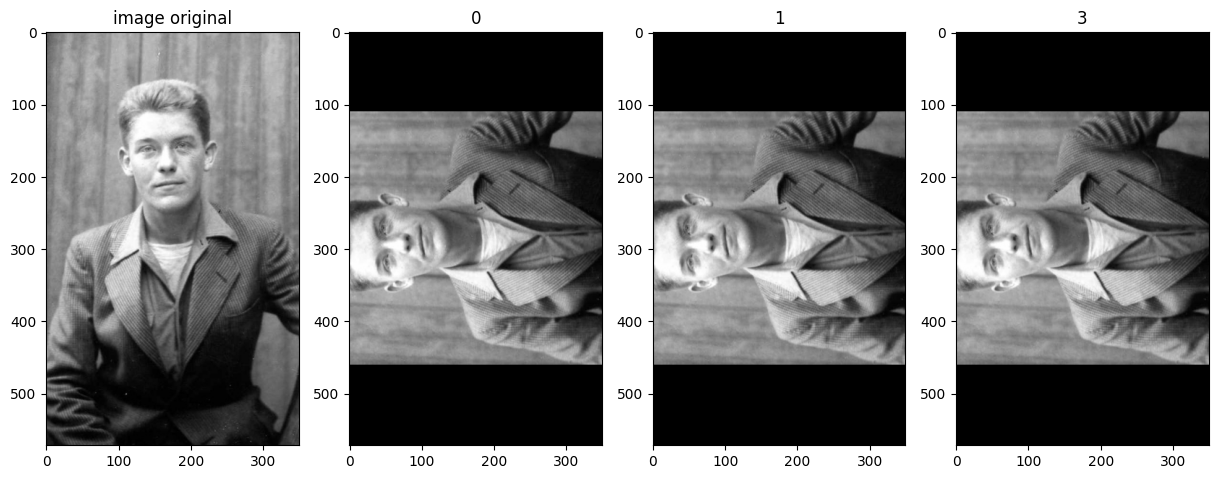

--- 3.7344350814819336 seconds ---


In [3]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
plt.figure(figsize=(15, 7))
plt.subplot(141)
plt.title("image original")
plt.imshow(img, cmap='gray')

orders = [0, 1,  3]
for i, order in enumerate(orders):
    rotated_img = rotate(img,90 ,order=order)
    plt.subplot(140 + i+2)
    plt.title(order)
    plt.imshow(rotated_img, cmap='gray')
  
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

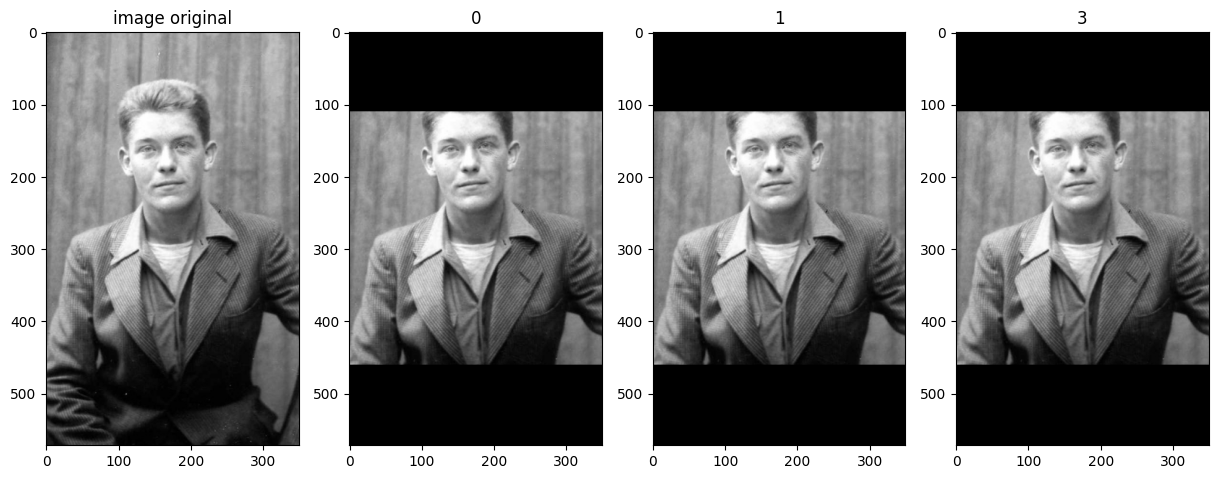

--- 2.386521100997925 seconds ---


In [4]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
plt.figure(figsize=(15, 7))
plt.subplot(141)
plt.title("image original")
plt.imshow(img, cmap='gray')

orders = [0, 1,  3]
for i, order in enumerate(orders):
    rotated_img = rotate(img,90 ,order=order)
    for j in range(3):
        rotated_img = rotate(rotated_img,90 ,order=order)
    plt.subplot(140 + i+2)
    plt.title(order)
    plt.imshow(rotated_img, cmap='gray')
  
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

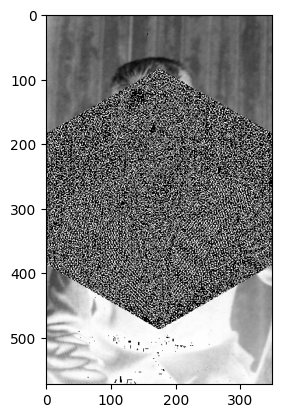

In [5]:
rotated_img = rotate(img,60 ,order=0)
for j in range(5):
    rotated_img = rotate(rotated_img,60 ,order=0)
diff = img - rotated_img

#diff
plt.imshow(diff*255, cmap="gray")

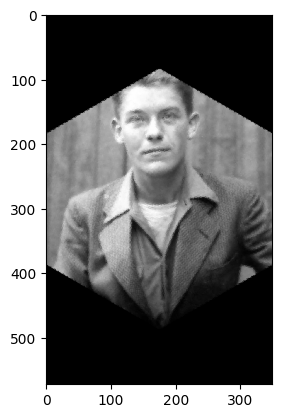

In [6]:
plt.imshow(rotated_img)

## Morphologie mathematique

## Appliquez la morphologie mathematique

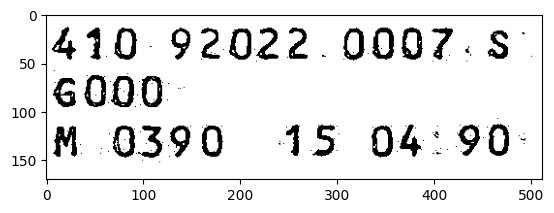

In [7]:
text = images["texte"]

plt.imshow(text, cmap='gray')

Erosion

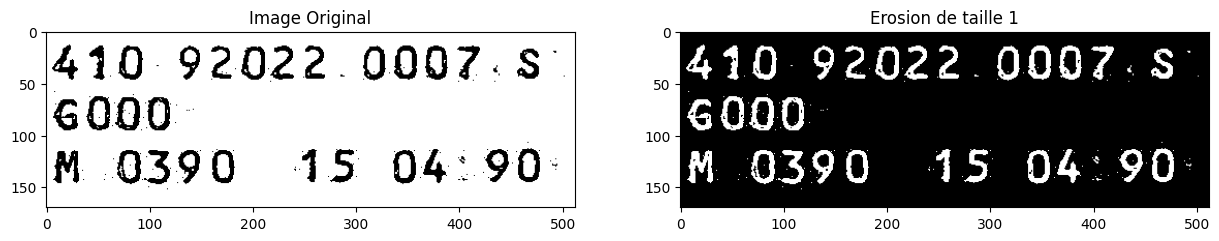

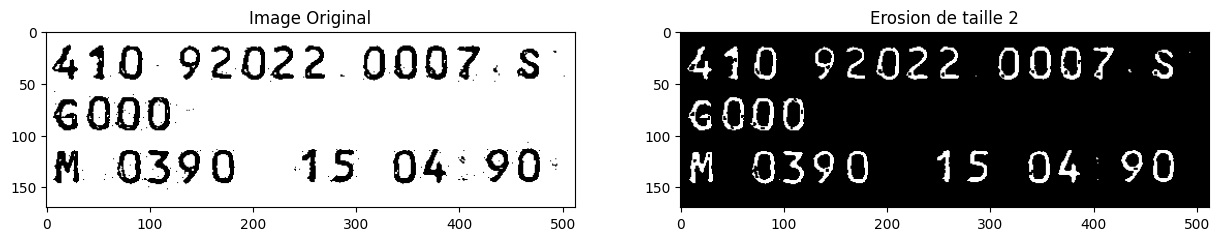

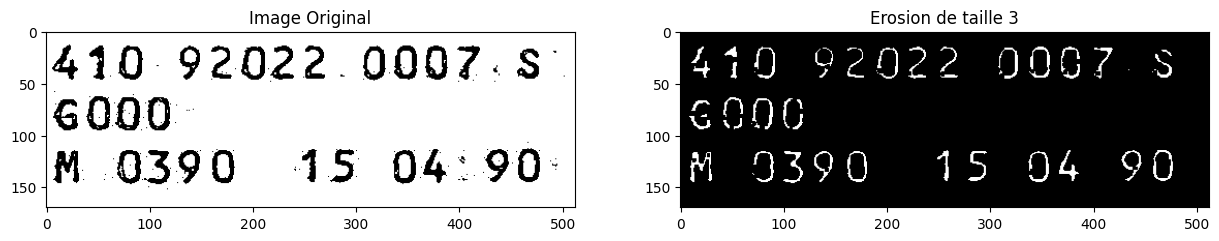

In [8]:
from skimage.morphology import square, rectangle

for size in [1, 2, 3]:
    structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    inverted_text = np.invert(text)
    eroded_text = cv2.erode(inverted_text, structurant)
    plt.figure(figsize=(15, 7))

    plt.subplot(121)
    plt.title("Image Original")
    plt.imshow(text, cmap='gray')

    plt.subplot(122)
    plt.title(f"Erosion de taille {size}")
    plt.imshow(eroded_text, cmap='gray')



Dilatation

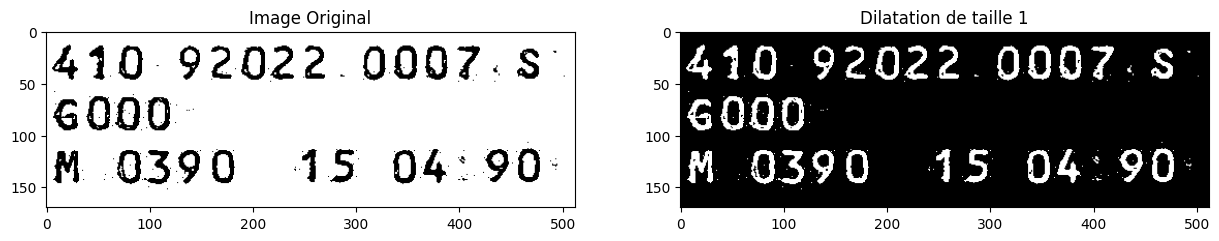

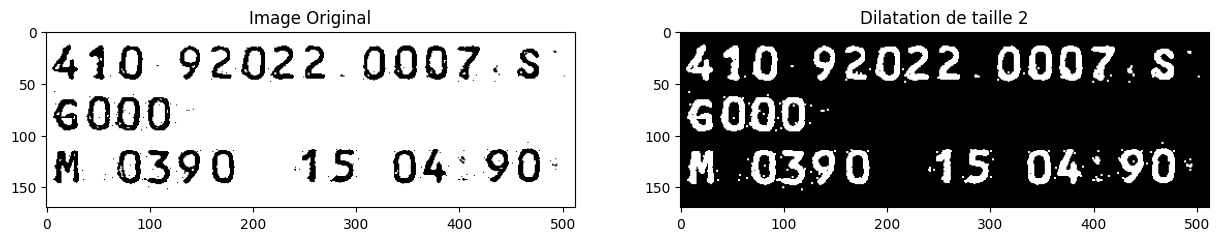

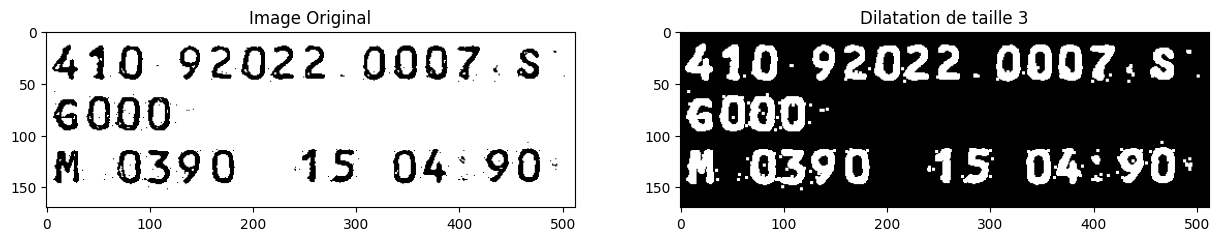

In [9]:
from skimage.morphology import square, rectangle

for size in [1, 2, 3]:
    structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    inverted_text = np.invert(text)
    eroded_text = cv2.dilate(inverted_text, structurant)
    plt.figure(figsize=(15, 7))

    plt.subplot(121)
    plt.title("Image Original")
    plt.imshow(text, cmap='gray')

    plt.subplot(122)
    plt.title(f"Dilatation de taille {size}")
    plt.imshow(eroded_text, cmap='gray')


### 1 .Nettoyage de l'image texte.bmp par morphologie mathematique

l'idée c'est de bouché les trous par dilation puis puis d'enlever les points par erosion 
en grou on fait une ouverture

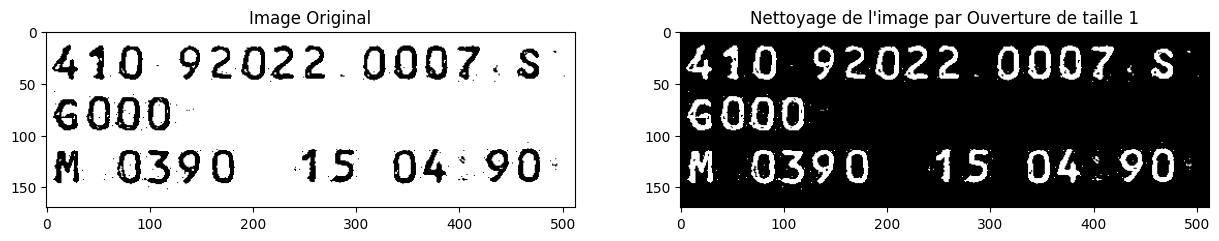

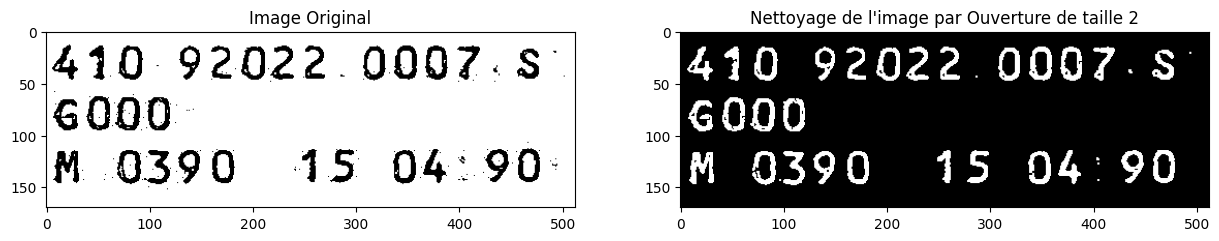

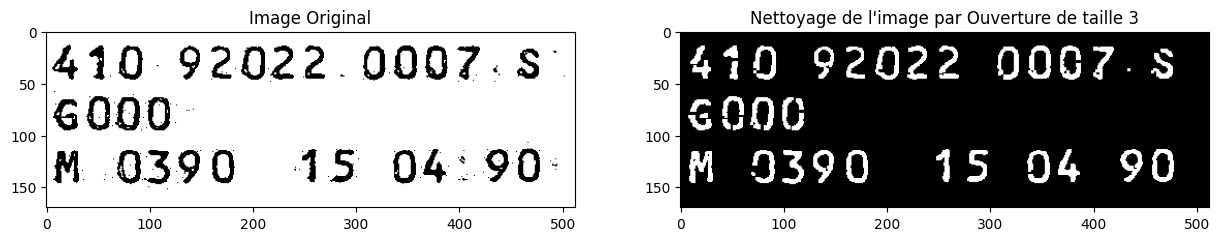

In [10]:
from skimage.morphology import square, rectangle

for size in [1, 2, 3]:
    structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    inverted_text = np.invert(text)
    eroded_text = cv2.erode(inverted_text, structurant)

    eroded_text = cv2.dilate(eroded_text, structurant)
    plt.figure(figsize=(15, 7))

    plt.subplot(121)
    plt.title("Image Original")
    plt.imshow(text, cmap='gray')

    plt.subplot(122)
    plt.title(f"Nettoyage de l'image par Ouverture de taille {size}")
    plt.imshow(eroded_text, cmap='gray')

In [11]:
### 2. restauration de code barre

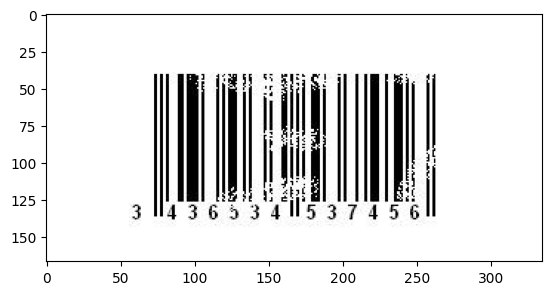

In [12]:
code_bar = images["codebarre"]
plt.imshow(code_bar, cmap="gray")

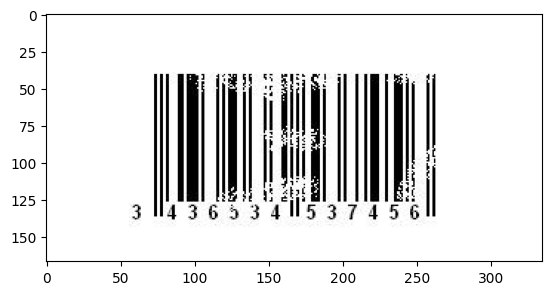

In [13]:
code_bar = images["codebarre"]
plt.imshow(code_bar, cmap="gray")

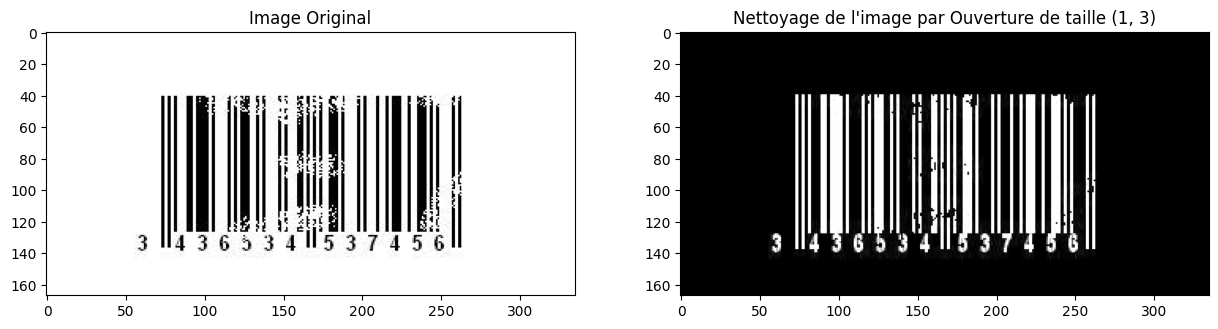

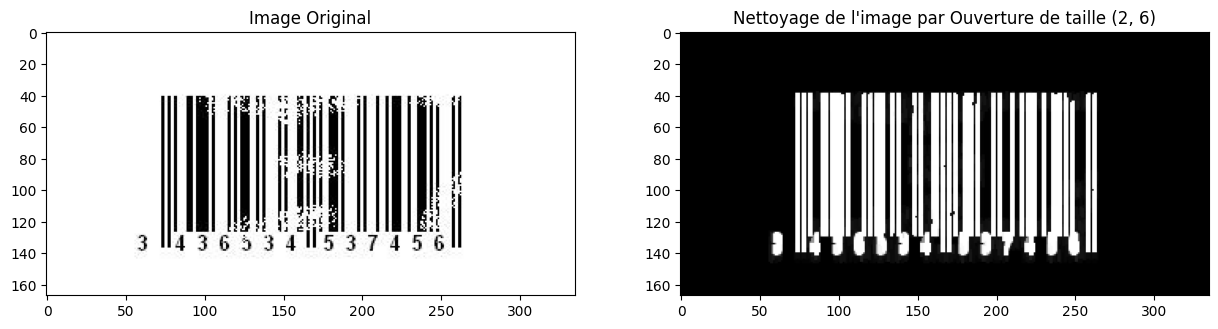

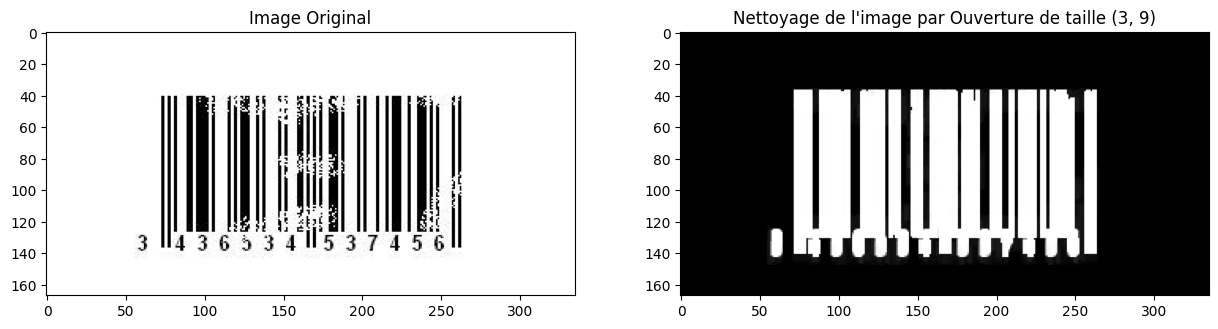

In [14]:
for size in [1, 2, 3]:
    structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (size, 3*size))
    inverted_img = np.invert(code_bar)
    eroded_img = cv2.dilate(inverted_img, structurant)

    #eroded_text = cv2.dilate(eroded_text, structurant)
    plt.figure(figsize=(15, 7))

    plt.subplot(121)
    plt.title("Image Original")
    plt.imshow(code_bar, cmap='gray')

    plt.subplot(122)
    plt.title(f"Nettoyage de l'image par Ouverture de taille {(size, 3*size)}")
    plt.imshow(eroded_img, cmap='gray')

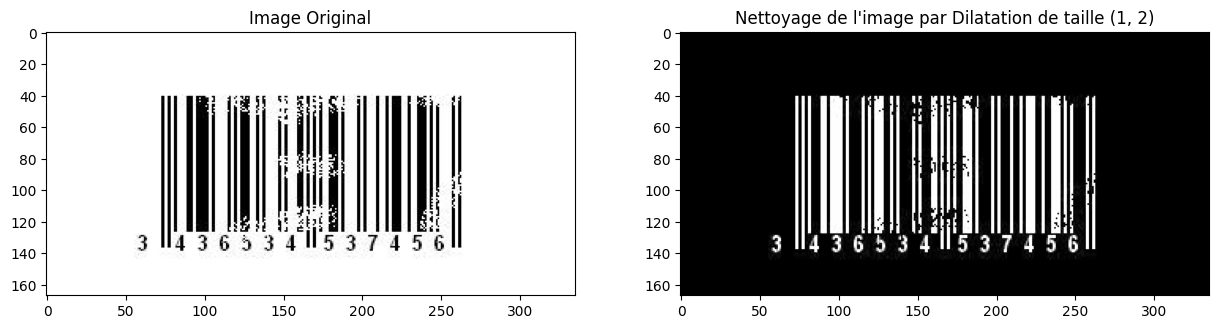

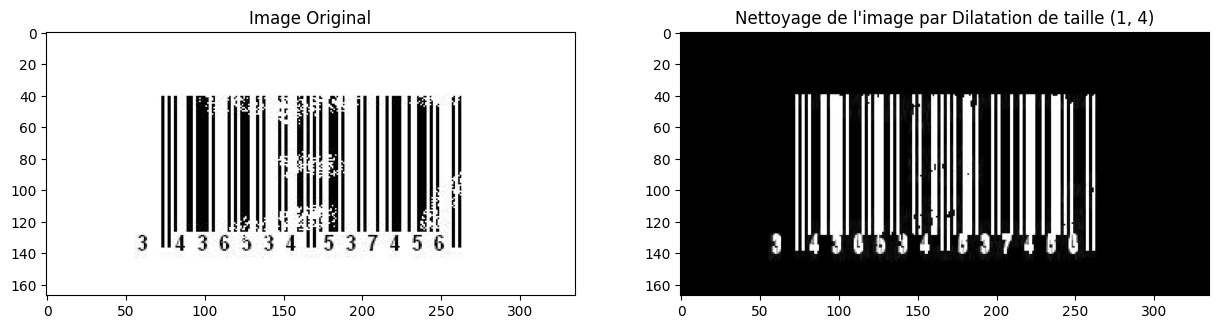

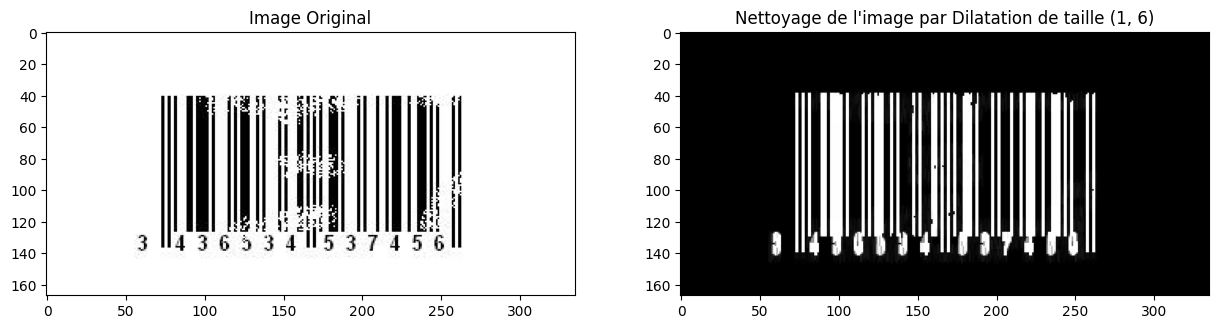

In [15]:
for size in [1, 2, 3]:
    structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 2*size))
    inverted_img = np.invert(code_bar)
    eroded_img = cv2.dilate(inverted_img, structurant)

    #eroded_text = cv2.dilate(eroded_text, structurant)
    plt.figure(figsize=(15, 7))

    plt.subplot(121)
    plt.title("Image Original")
    plt.imshow(code_bar, cmap='gray')

    plt.subplot(122)
    plt.title(f"Nettoyage de l'image par Dilatation de taille {(1, 2*size)}")
    plt.imshow(eroded_img, cmap='gray')

avec un rectangle 2 * 6 comme element structurant on a un meilleur nettoyage

### 3.En soustraiyant la dilation ou l'erosion à l'image original on peut obtenir les contours d'une images binaires

### 4. Implementation de l'amin

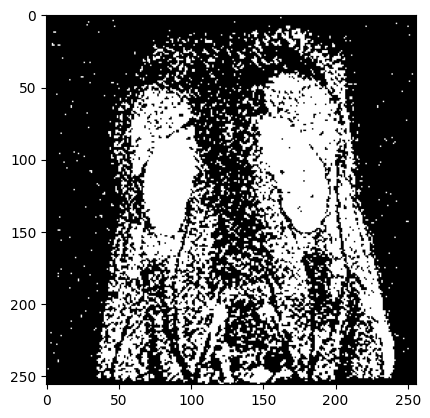

In [128]:
uro = images["uro_irm"]
uro = cv2.cvtColor(uro, cv2.COLOR_RGB2GRAY)
_, uro_seulle = cv2.threshold(uro,127, 255, cv2.THRESH_OTSU )

plt.imshow(uro_seulle, cmap="gray")

In [71]:
kernels = []

for i in range(3):
    a = np.ones((3, 3))
    a[:, i] = 0
    kernels.append(a)

for i in range(3):
    a = np.ones((3, 3))
    a[i, :] = 0
    kernels.append(a)

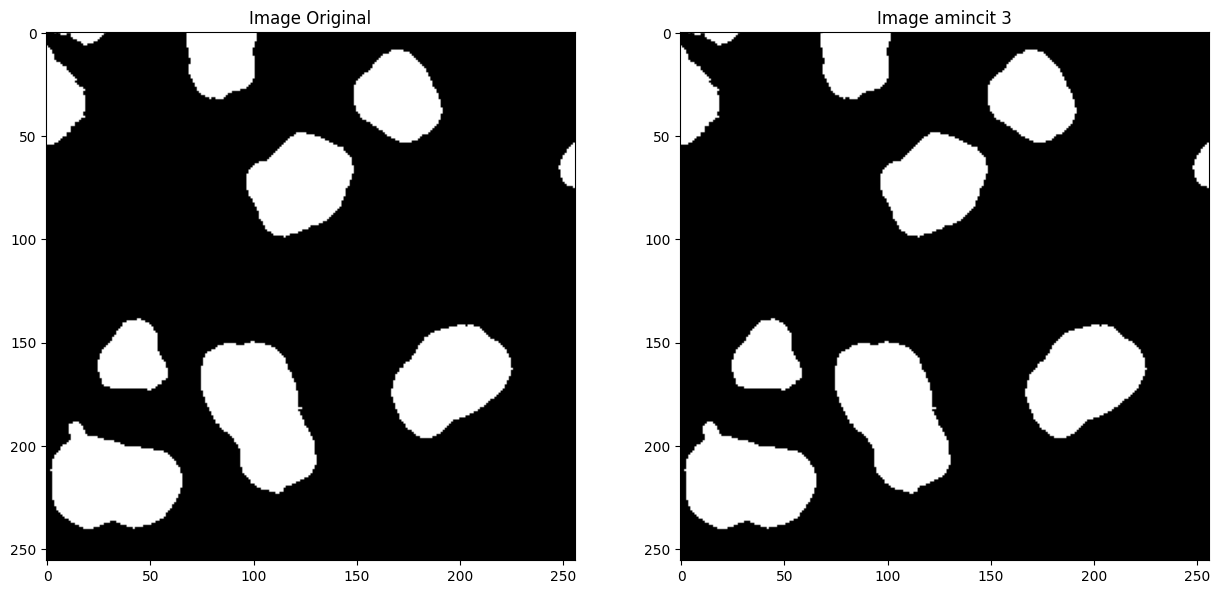

In [116]:
a_struct = np.array(
    [[-1, -1, -1],
     [-1, 1, 1], 
     [-1, 1, 0]])

aminc_img= chro_seulle - cv2.morphologyEx(chro_seulle, cv2.MORPH_HITMISS, a_struct)
while np.count_nonzero(aminc_img - cv2.morphologyEx(aminc_img, cv2.MORPH_HITMISS, a_struct)) < 100 :
    aminc_img = aminc_img - cv2.morphologyEx(aminc_img, cv2.MORPH_HITMISS, a_struct) 


plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title("Image Original")
plt.imshow(chro_seulle, cmap='gray')

plt.subplot(122)
plt.title(f"Image amincit {size}")
plt.imshow(aminc_img, cmap='gray')

In [68]:
for kernel in kernels:
    aminc_img= chro_seulle - cv2.morphologyEx(chro_seulle, cv2.MORPH_ERODE, kernel=kernel)


    plt.figure(figsize=(15, 7))

    plt.subplot(131)
    plt.title("Image Original")
    plt.imshow(chro_seulle, cmap='gray')

    plt.subplot(132)
    plt.title("Kernal")
    plt.imshow(aminc_img, cmap='gray')

    plt.subplot(133)
    plt.title("Image amincit")
    plt.imshow(aminc_img, cmap='gray')

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/morph.simd.hpp:649: error: (-215:Assertion failed) _kernel.type() == CV_8U in function 'MorphFilter'
